<a href="https://colab.research.google.com/github/10zinchosang/Summer2022-DataAnalytics/blob/main/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

## Tenzin Chosang
## July 18, 2022

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
# Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
# Show first 5 rows
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
# Show shape (row, column)
df.shape

(48054, 5)

In [ ]:
# Show column names
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
# Create new dataframe with only New York data
ny_df = df[df['state']=='New York']

In [ ]:
# Show first 5 rows
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
# Show shape (rows, columns)
ny_df.shape

(870, 5)

In [ ]:
# Show last 5 rows
ny_df.tail()

,date,state,fips,cases,deaths
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268


In [ ]:
# First death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
# Total number of cases
ny_df['cases'].max()

5722320

In [ ]:
# Not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1909853094

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
# New cases for NY
# type(ny_df['cases'])

# Subtract current from previous case count to get new case count
newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# First 5 rows of NY data
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
# Added all new cases within NY
ny_df['new_cases'].sum()

5722320

In [ ]:
# Set variables to columns of NY dataframe
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

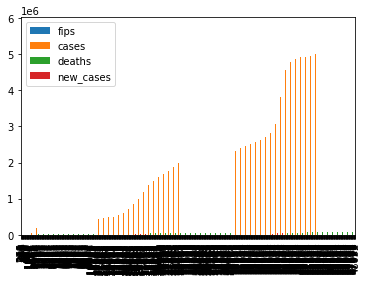

In [ ]:
# Bar plot
ny_df.plot(kind='bar')

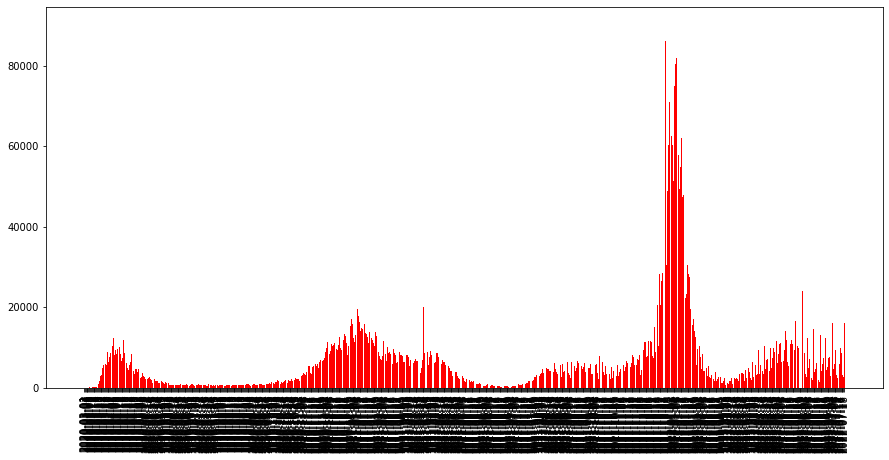

In [ ]:
# Plot new cases over time
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
# Set new variables to NY dataframe sliced for the last 30 days
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

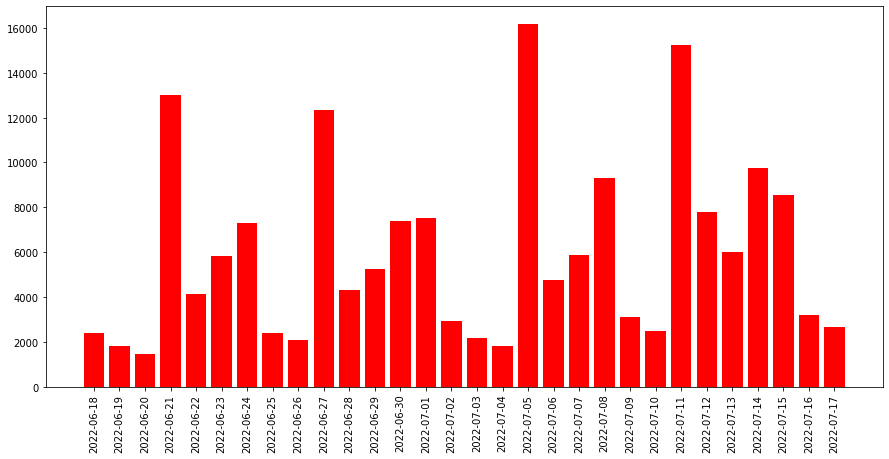

In [ ]:
# Plot new cases across last 30 days
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

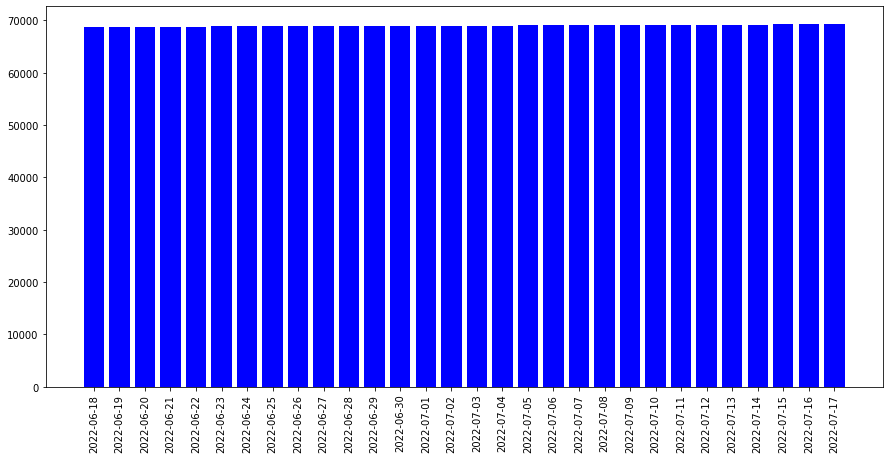

In [ ]:
# Plot total deaths(cumulative) over last 30 days
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
# Create list of states
states = ['New York', 'California','Florida', 'Texas','Arizona']

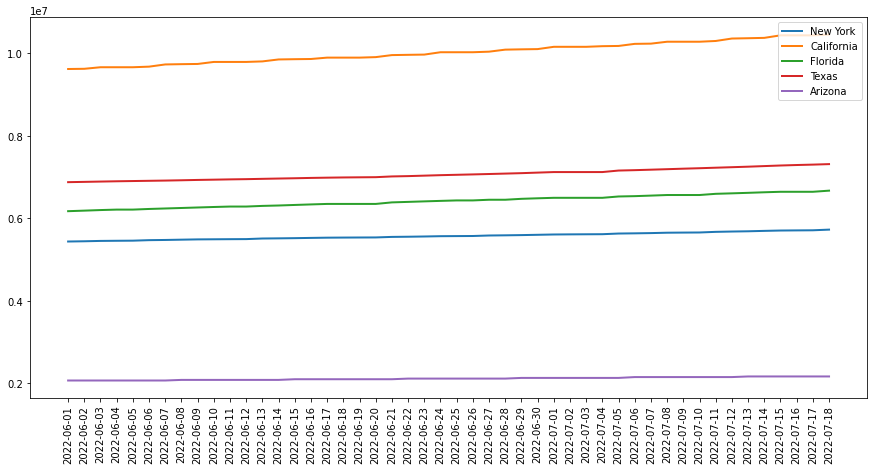

In [ ]:
# Plot each states total cases across time after June 2022, not enough data for half of July right now
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2022-06-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2)
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1: 
Looking at NY cases plotted over time we can see it rises up to around 5-6 million cases in a "bumpy" kind of path and not linearly. This raises the question, "Did this happen because as new cases flattened out, mask mandates were relaxed and more things opened up, which then caused an increase in cases?". It seems this pattern could have repeated twice. Looking at NY new cases plotted over time, new cases spiked every few months with a very large spike at around end of 2021. Looking at NY new cases plotted over last 30 days, we see spikes roughly every week. Is there any significance to this data? Or, is it just because most people have more time to get tested on weekends, which is a few days before each spike (keeping in mind most results take around 48 hours to get). Across the last 30 days it seems about 1000 deaths occured. When comparing total cases among New York, California, Florida, Texas, and Arizona over time, the order of cases (most to least) exactly matched the order of the respective state's current population (most to least). Checking out the percentage of cases per population could be significant. If one state had a significantly lower percentage of cases, we could look into their mask and vaccine policies to see what they could be doing better than others.

2.   Conclusion 2
     --Your text here>

